<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_02_08_2021/notebooks/week_3_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Tasks:

Hourly arrival data from week-1: https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour.csv

Description: https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour_desc.txt

#Task-1:

In [174]:
import pandas as pd

In [175]:
data = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour.csv')

In [176]:
# Counti: Total number of customers who made a transaction between (i-1):00:00 (Inclusive) and i:00:00 (Exclusive) on a given date.
data

,Date,Count1,Count2,Count3,Count4,Count5,Count6,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Count22,Count23,Count24
0,2010-12-01,0,0,0,0,0,0,0,0,3,12,9,11,20,12,7,11,9,4,0,0,0,0,0,0
1,2010-12-02,0,0,0,0,0,0,0,2,3,5,10,9,14,11,7,13,10,9,9,2,0,0,0,0
2,2010-12-03,0,0,0,0,0,0,0,0,0,5,6,4,9,6,9,6,3,2,0,0,0,0,0,0
3,2010-12-05,0,0,0,0,0,0,0,0,0,0,8,13,17,16,7,14,4,0,0,0,0,0,0,0
4,2010-12-06,0,0,0,0,0,0,0,0,2,4,11,12,19,13,8,12,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,0,0,0,0,0,0,0,3,5,9,9,18,16,16,11,15,6,0,0,0,0,0,0
301,2011-12-06,0,0,0,0,0,0,0,0,4,6,9,17,25,10,14,8,6,6,0,0,0,0,0,0
302,2011-12-07,0,0,0,0,0,0,0,0,7,7,8,12,20,12,9,11,5,4,0,0,0,0,0,0
303,2011-12-08,0,0,0,0,0,0,0,0,1,9,7,12,19,14,7,14,6,5,7,5,1,0,0,0


In [177]:
data['Date'] = pd.to_datetime(data['Date'])

In [178]:
data.drop(data[data.Date.dt.isocalendar().year==2010].index,inplace=True)

In [179]:
dates=[None,None,None,None]

In [180]:
for i in range(4):
  dates[i] = data.loc[data['Date'].dt.quarter==i+1,'Date']

In [181]:
dates[0]

20   2011-01-04
21   2011-01-05
22   2011-01-06
23   2011-01-07
24   2011-01-09
        ...    
90   2011-03-27
91   2011-03-28
92   2011-03-29
93   2011-03-30
94   2011-03-31
Name: Date, Length: 75, dtype: datetime64[ns]

In [182]:
weekNumber=[None,None,None,None]

In [183]:
for i in range(4):
  weekNumber[i]=dates[i].dt.isocalendar().week
  weekNumber[i]=pd.DataFrame(weekNumber[i]).drop_duplicates().set_index('week')

In [184]:
weekNumber[1]

""
week
13
14
15
16
17
18
19
20
21


In [185]:
for i in range(4):
  weekNumber[i][['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]=0

In [186]:
weekNumber[0]

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
week,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
for i in range(4):
  for date in dates[i]:
    weekNumber[i].loc[weekNumber[i].index==date.week,date.day_name()]=1

In [188]:
weekNumber[0]

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
week,,,,,,,
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [189]:
weekly_missing_days=weekNumber

In [190]:
weekly_missing_days[0]

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
week,,,,,,,
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [191]:
#weekNumber.to_csv('weekly_missing_days.csv',index=False)

In [192]:
#weekly_missing_days=pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/weekly_missing_days.csv')

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Heatmap for Weekly Data for Quarter-1')

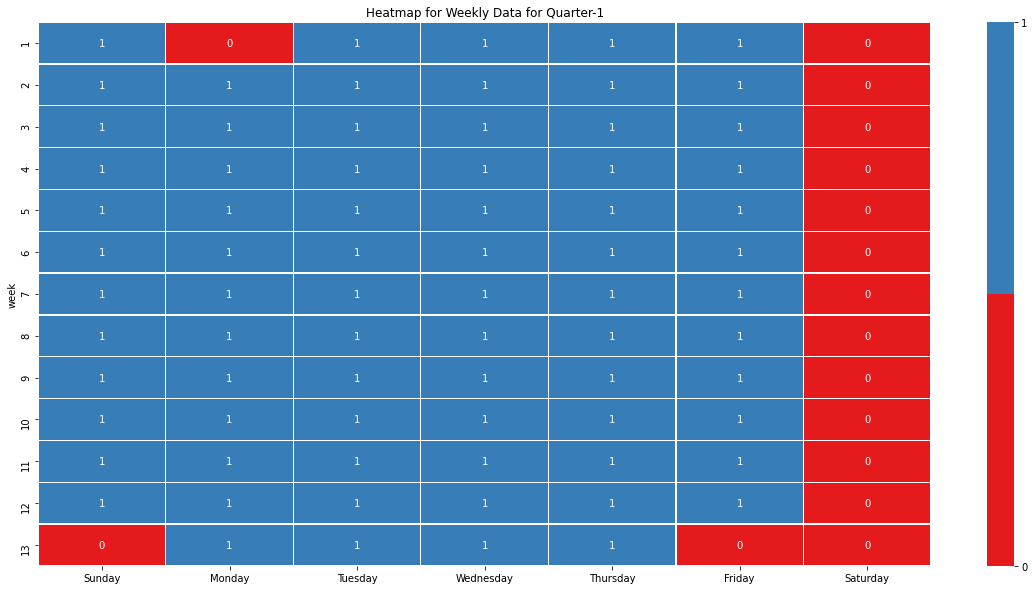

In [195]:
plt.figure(figsize=(20,10))
sns.heatmap(weekly_missing_days[0],annot=True,linewidths=.3,cmap = sns.mpl_palette('Set1', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data for Quarter-1')

Text(0.5, 1.0, 'Heatmap for Weekly Data for Quarter-2')

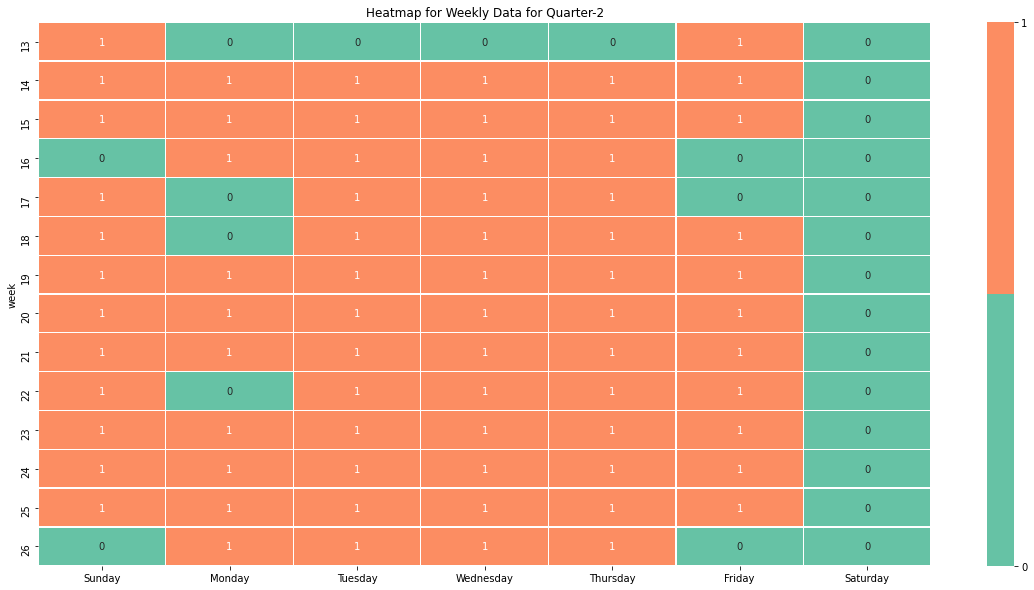

In [197]:
plt.figure(figsize=(20,10))
sns.heatmap(weekly_missing_days[1],annot=True,linewidths=.3,cmap = sns.mpl_palette('Set2', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data for Quarter-2')

Text(0.5, 1.0, 'Heatmap for Weekly Data for Quarter-3')

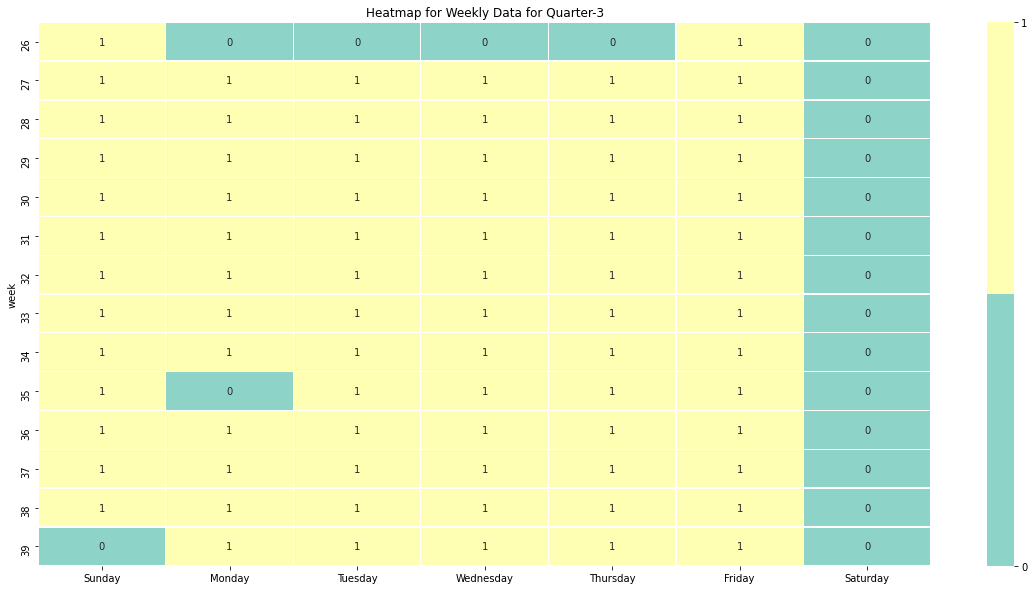

In [199]:
plt.figure(figsize=(20,10))
sns.heatmap(weekly_missing_days[2],annot=True,linewidths=.3,cmap = sns.mpl_palette('Set3', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data for Quarter-3')

Text(0.5, 1.0, 'Heatmap for Weekly Data for Quarter-4')

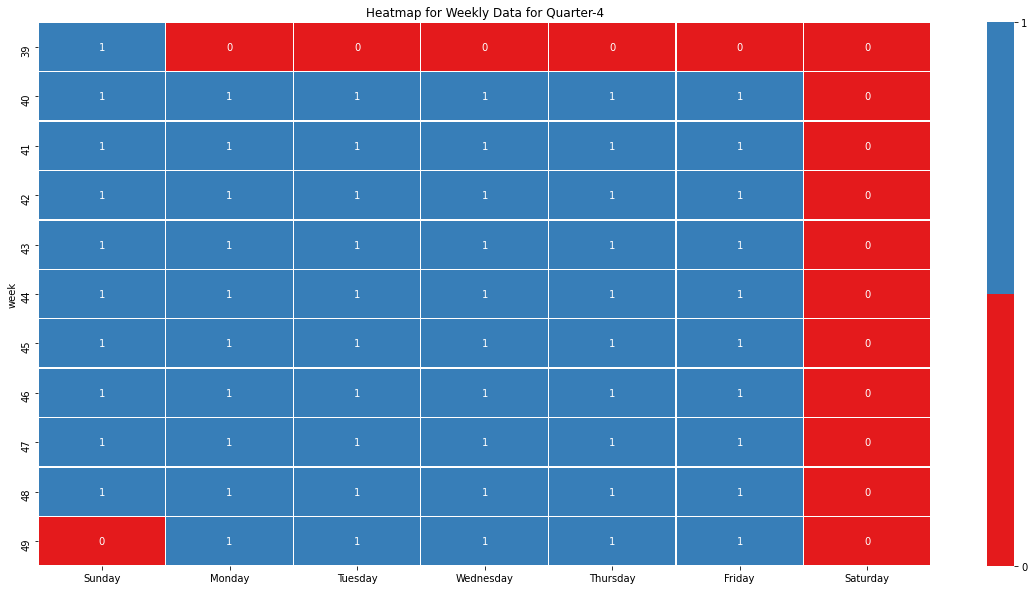

In [200]:
plt.figure(figsize=(20,10))
sns.heatmap(weekly_missing_days[3],annot=True,linewidths=.3,cmap = sns.mpl_palette('Set1', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data for Quarter-4')

In [201]:
weekly_missing_days_all=weekly_missing_days[0]
for i in range(1,4):
  weekly_missing_days_all=weekly_missing_days_all.append(weekly_missing_days[i])

In [203]:
weekly_missing_days_all.head()

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
week,,,,,,,
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Text(0.5, 1.0, 'Heatmap for Weekly Data')

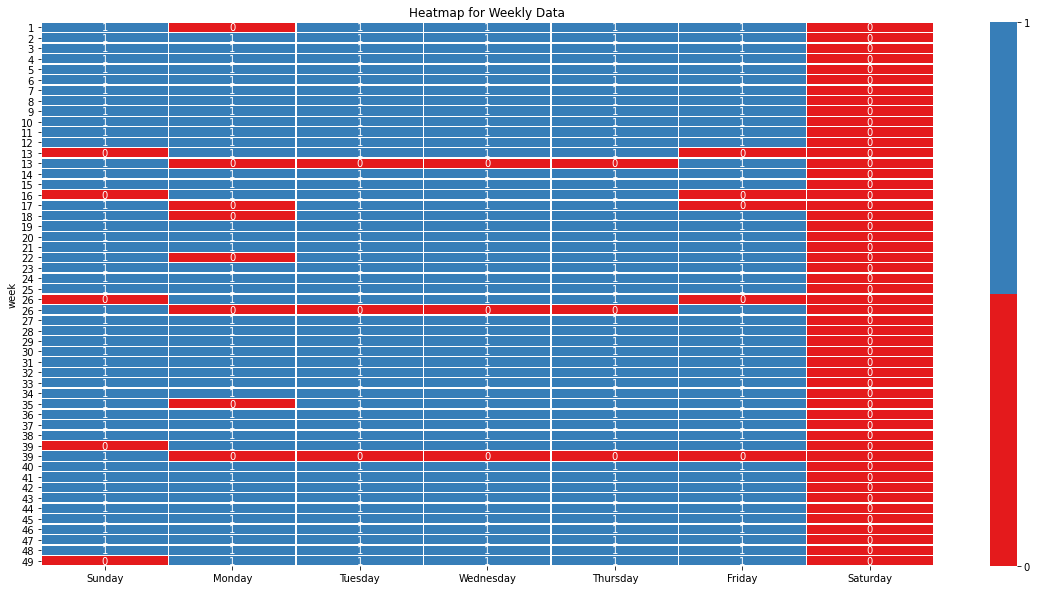

In [206]:
plt.figure(figsize=(20,10))
sns.heatmap(weekly_missing_days_all,annot=True,linewidths=.3,cmap = sns.mpl_palette('Set1', 2),cbar_kws={'ticks':[0,1]})
plt.title('Heatmap for Weekly Data')